# Grad Cam

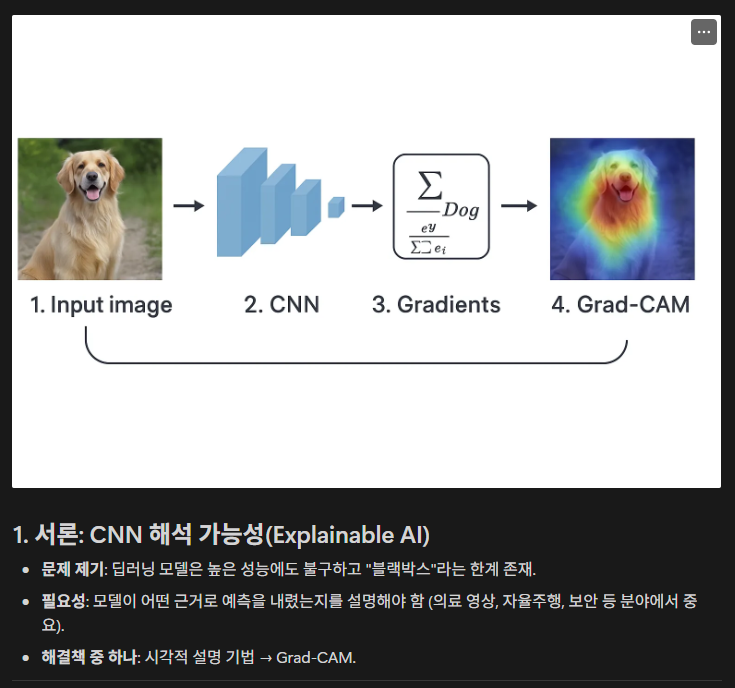

In [48]:
from pytorch_grad_cam import GradCAM, AblationCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
import numpy as np
import torch
import torch.nn as nn
from torchvision.transforms import Compose,Normalize,ToTensor
from torchvision import transforms
from torchvision.models import resnet34
import os
import time
from PIL import Image

In [49]:
model = resnet34(pretrained=False)
model

c:\walker\code\deep-learning\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\walker\code\deep-learning\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [50]:
model.fc = nn.Linear(512,3,bias=True)
model.load_state_dict(torch.load("../model_pth/mymodel.pth",map_location='cpu'))
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [51]:
image = Image.open('../data/ka.jpg')

transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        ToTensor(),
        Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]
)

input_img = transform(image).unsqueeze(0)
input_img.shape

torch.Size([1, 3, 224, 224])

In [52]:
# (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
layer = model.layer4[2].conv2

targets = [ClassifierOutputTarget(1)] # class index 번호 - 카리나 idx : 1
targets

In [53]:
cam = AblationCAM(model=model, target_layers=[layer])
cam.batch_size = 1
grayscale_cam = cam(input_tensor=input_img, targets=targets)
grayscale_cam = grayscale_cam[0,:]
grayscale_cam

100%|██████████| 512/512 [00:21<00:00, 24.37it/s]


array([[0.        , 0.        , 0.        , ..., 0.20077772, 0.20077772,
        0.20077772],
       [0.        , 0.        , 0.        , ..., 0.20077772, 0.20077772,
        0.20077772],
       [0.        , 0.        , 0.        , ..., 0.20077772, 0.20077772,
        0.20077772],
       ...,
       [0.38819915, 0.38819915, 0.38819915, ..., 0.37089768, 0.37089768,
        0.37089768],
       [0.38819915, 0.38819915, 0.38819915, ..., 0.37089768, 0.37089768,
        0.37089768],
       [0.38819915, 0.38819915, 0.38819915, ..., 0.37089768, 0.37089768,
        0.37089768]], shape=(224, 224), dtype=float32)

In [ ]:
grayscale_cam.max() # 아예 특징을 찾지 못한 경우 : 0.0

np.float32(0.9999999)

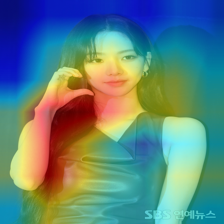

In [55]:
image = Image.open('../data/ka.jpg')
image = image.resize((224,224))
rgb_img = np.float32(image)/255
result_grad_cam = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
display(Image.fromarray(result_grad_cam))